# Assignment Part-I (Shrey Khurana) (DS C41 February 2022) (EDS21120353)

## Data Understanding

#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting the display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Importing the data

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking the Null values in the data

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Checking Percentage Null values
null_df = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null Percentage"])
null_df.index.name = 'Column Name'

In [8]:
null_df.head()

,Null Percentage
Column Name,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [9]:
# Checking the columns where the null values is greater than 0
null_df_greater_zero = null_df[null_df["Null Percentage"] > 0]
null_df_greater_zero

,Null Percentage
Column Name,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [10]:
# Dropping the top 5 null values columns i.e. PoolQC, MiscFeature, Alley, Fence and FireplaceQu
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
# Now dropping the 'Id' column as it seems to be reduntant
df = df.drop(['Id'],axis=1)

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
# Get all Columns
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
 

In [15]:
# Get categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [16]:
# Get numerical columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [17]:
# Again Checking the columns where the null values is greater than 0
null_df = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null Percentage"])
null_df.index.name = 'Column Name'

null_df_greater_zero = null_df[null_df["Null Percentage"] > 0]
null_df_greater_zero

,Null Percentage
Column Name,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


In [18]:
# Now we will check the values in above columns using value_counts method
print('LotFrontage: ',df['LotFrontage'].value_counts())
print('GarageCond: ',df['GarageCond'].value_counts())
print('GarageType: ',df['GarageType'].value_counts())
print('GarageYrBlt: ',df['GarageYrBlt'].value_counts())
print('GarageFinish: ',df['GarageFinish'].value_counts())
print('GarageQual: ',df['GarageQual'].value_counts())
print('BsmtExposure: ',df['BsmtExposure'].value_counts())
print('BsmtFinType2: ',df['BsmtFinType2'].value_counts())
print('BsmtFinType1: ',df['BsmtFinType1'].value_counts())
print('BsmtCond: ',df['BsmtCond'].value_counts())
print('BsmtQual: ',df['BsmtQual'].value_counts())
print('MasVnrArea: ',df['MasVnrArea'].value_counts())
print('MasVnrType: ',df['MasVnrType'].value_counts())
print('Electrical: ',df['Electrical'].value_counts())

LotFrontage:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      

In [19]:
# Since Outliers are present in 'LotFrontage' column so we will impute the missing value with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [20]:
# Since Outliers are present in 'GarageYrBlt' column so we will impute the missing value with median
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [21]:
# For 'GarageCond', 'GarageType', 'GarageFinish','GarageQual' we will impute the null values with the mode
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [22]:
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):   
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [24]:
# Check if any null are presnt in the data frame given
df.isnull().values.any()

False

In [25]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

##### Now From above 2 outputs we can say that the our data is clean now

In [26]:
df.shape

(1460, 75)

In [27]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
print(df['PoolArea'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [29]:
df = df.drop(['PoolArea'],axis=1)

In [30]:
print(df['MiscVal'].value_counts())

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64


In [31]:
df = df.drop(['MiscVal'],axis=1)

In [32]:
print(df['3SsnPorch'].value_counts())

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [33]:
df = df.drop(['3SsnPorch'],axis=1)

In [34]:
# Now again checking the Shape
df.shape

(1460, 72)

In [35]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


## Exploaratory Data Analysis (EDA) and Visualization

In [36]:
#Checking Numeric Columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

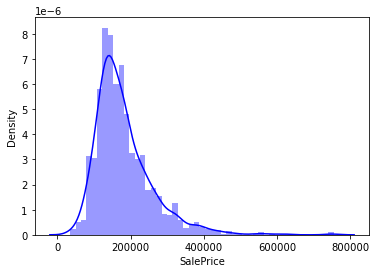

In [37]:
# Plotting the sales Price graph
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

In [38]:
# Using the IQR method to remove the outliers
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

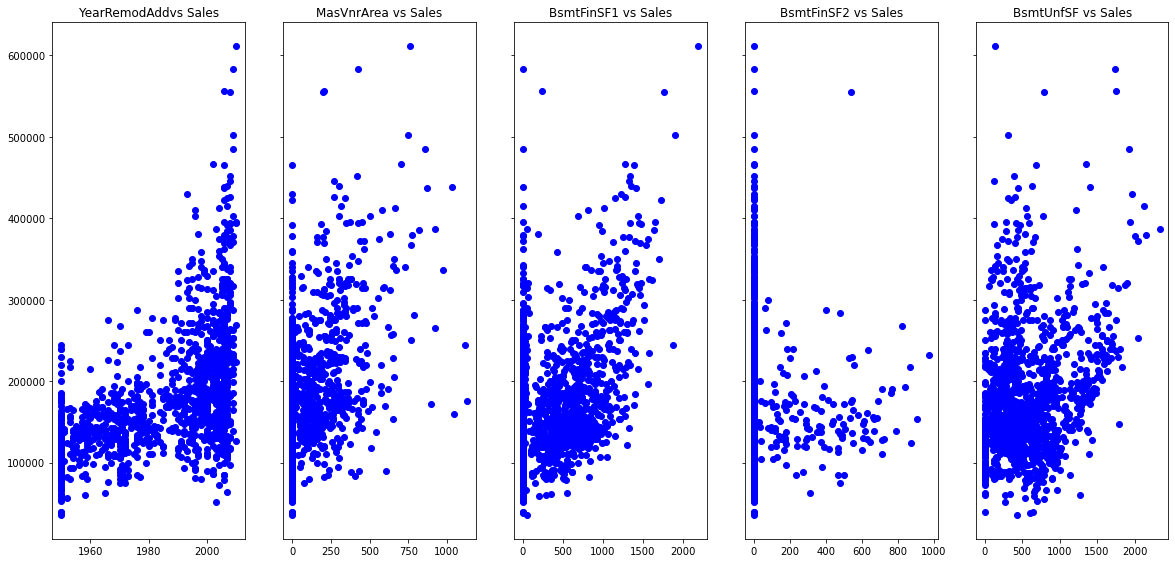

In [40]:
# Plotting Scatter plot for getting the relation
fig, ax = plt.subplots(ncols= 5,sharey=True)

YearRemodAdd = ax[0].scatter(df['YearRemodAdd'], df['SalePrice'],color='blue')
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(df['MasVnrArea'], df['SalePrice'],color='blue')
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(df['BsmtFinSF1'], df['SalePrice'],color='blue')
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(df['BsmtFinSF2'], df['SalePrice'],color='blue')
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(df['BsmtUnfSF'], df['SalePrice'],color='blue')
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')


fig.set_size_inches(20, 9.5, forward=True)
plt.show()

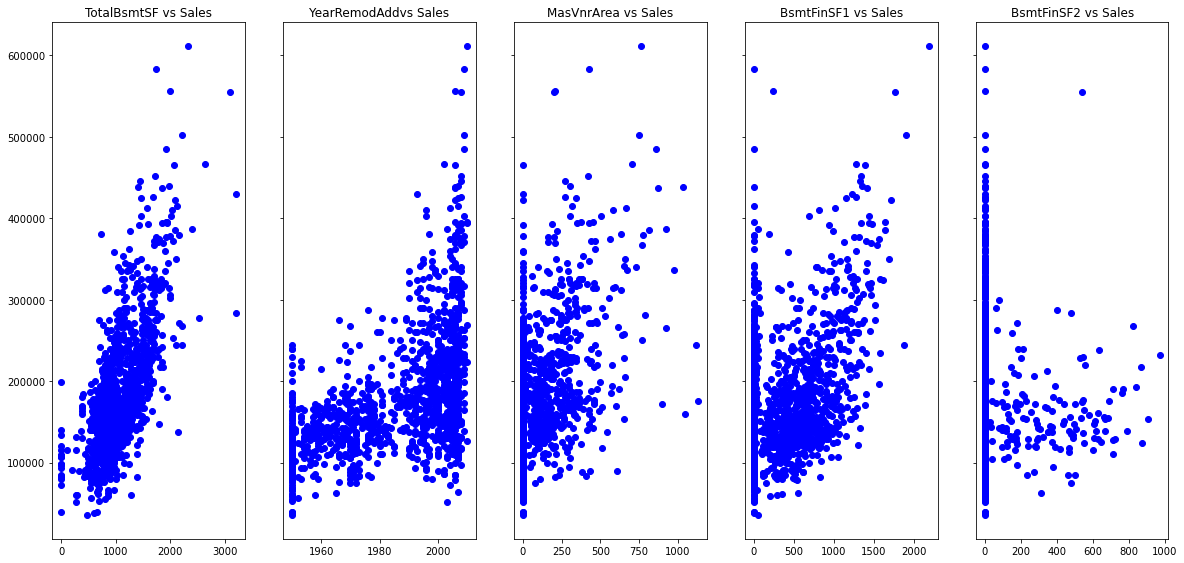

In [41]:
fig, ax = plt.subplots(ncols=5, sharey=True)

TotalBsmtSF = ax[0].scatter(df['TotalBsmtSF'], df['SalePrice'],color='blue')
TotalBsmtSF.set_label("TotalBsmtSF")
ax[0].set_title('TotalBsmtSF vs Sales')

YearRemodAdd = ax[1].scatter(df['YearRemodAdd'], df['SalePrice'],color='blue')
YearRemodAdd.set_label("YearRemodAdd")
ax[1].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[2].scatter(df['MasVnrArea'], df['SalePrice'],color='blue')
MasVnrArea.set_label("MasVnrArea")
ax[2].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[3].scatter(df['BsmtFinSF1'], df['SalePrice'],color='blue')
BsmtFinSF1.set_label("BsmtFinSF1")
ax[3].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[4].scatter(df['BsmtFinSF2'], df['SalePrice'],color='blue')
BsmtFinSF2.set_label("BsmtFinSF2")
ax[4].set_title('BsmtFinSF2 vs Sales')


fig.set_size_inches(20, 9.5, forward=True)
plt.show()

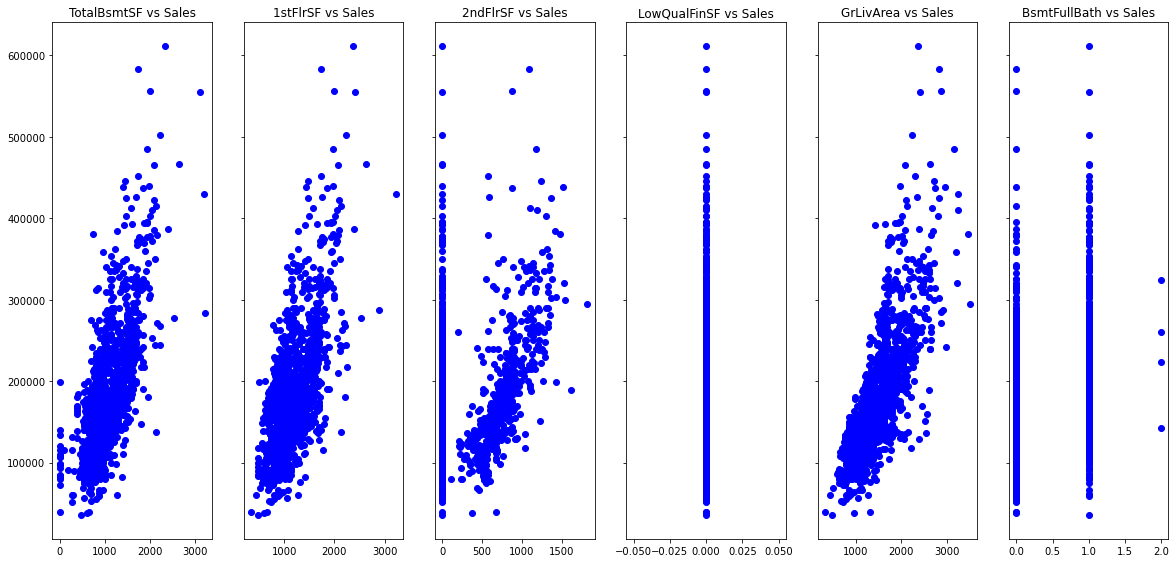

In [42]:
fig, ax = plt.subplots(ncols=6, sharey=True)

TotalBsmtSF = ax[0].scatter(df['TotalBsmtSF'], df['SalePrice'],color='blue')
TotalBsmtSF.set_label("TotalBsmtSF")
ax[0].set_title('TotalBsmtSF vs Sales')

stFlrSF = ax[1].scatter(df['1stFlrSF'], df['SalePrice'],color='blue')
stFlrSF.set_label("1stFlrSF")
ax[1].set_title('1stFlrSF vs Sales')

ndFlrSF= ax[2].scatter(df['2ndFlrSF'], df['SalePrice'],color='blue')
ndFlrSF.set_label("2ndFlrSF")
ax[2].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[3].scatter(df['LowQualFinSF'], df['SalePrice'],color='blue')
LowQualFinSF.set_label("LowQualFinSF")
ax[3].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[4].scatter(df['GrLivArea'], df['SalePrice'],color='blue')
GrLivArea.set_label("GrLivArea")
ax[4].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[5].scatter(df['BsmtFullBath'], df['SalePrice'],color='blue')
BsmtFullBath.set_label("BsmtFullBath")
ax[5].set_title('BsmtFullBath vs Sales')

fig.set_size_inches(20, 9.5, forward=True)
plt.show()

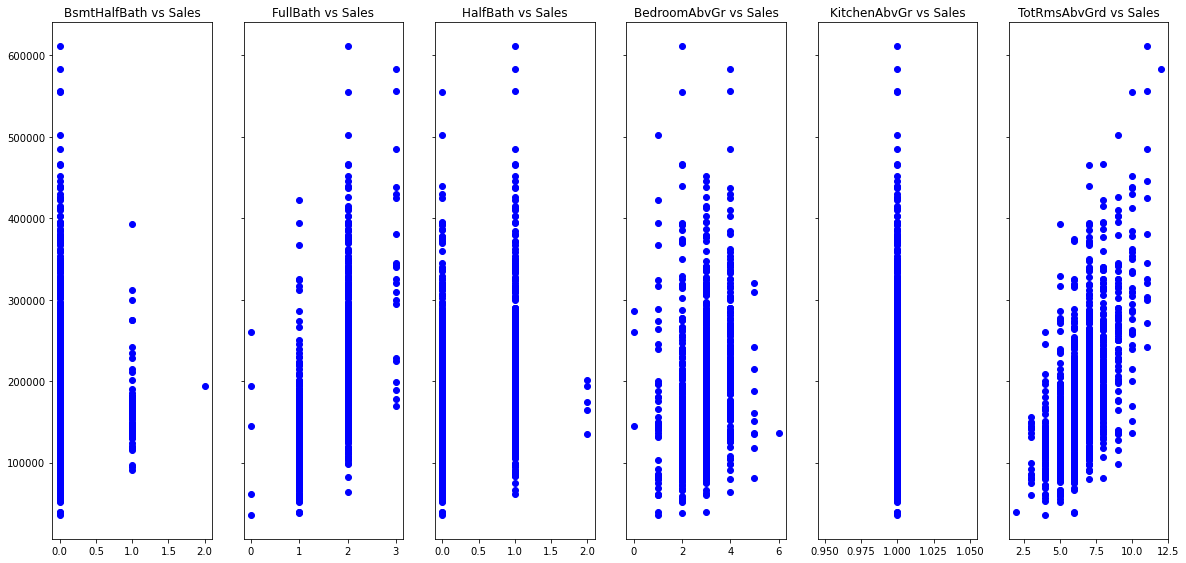

In [43]:
fig, ax = plt.subplots(ncols=6, sharey=True)

BsmtHalfBath = ax[0].scatter(df['BsmtHalfBath'], df['SalePrice'],color='blue')
BsmtHalfBath.set_label("BsmtHalfBath")
ax[0].set_title('BsmtHalfBath vs Sales')

FullBath = ax[1].scatter(df['FullBath'], df['SalePrice'],color='blue')
FullBath.set_label("FullBath")
ax[1].set_title('FullBath vs Sales')

HalfBath= ax[2].scatter(df['HalfBath'], df['SalePrice'],color='blue')
HalfBath.set_label("HalfBath")
ax[2].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[3].scatter(df['BedroomAbvGr'], df['SalePrice'],color='blue')
BedroomAbvGr.set_label("BedroomAbvGr")
ax[3].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[4].scatter(df['KitchenAbvGr'], df['SalePrice'],color='blue')
KitchenAbvGr.set_label("KitchenAbvGr")
ax[4].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[5].scatter(df['TotRmsAbvGrd'], df['SalePrice'],color='blue')
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[5].set_title('TotRmsAbvGrd vs Sales')

fig.set_size_inches(20, 9.5, forward=True)
plt.show()

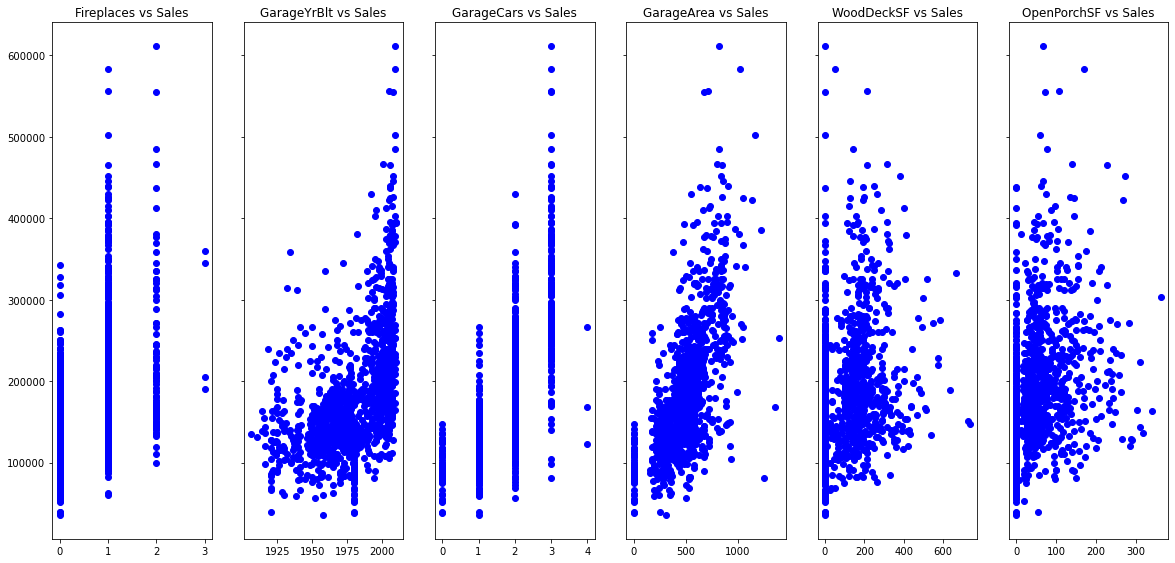

In [44]:
fig, ax = plt.subplots(ncols=6, sharey=True)

Fireplaces = ax[0].scatter(df['Fireplaces'], df['SalePrice'],color='blue')
Fireplaces.set_label("Fireplaces")
ax[0].set_title('Fireplaces vs Sales')


GarageYrBlt = ax[1].scatter(df['GarageYrBlt'], df['SalePrice'],color='blue')
GarageYrBlt.set_label("GarageYrBlt")
ax[1].set_title('GarageYrBlt vs Sales')

GarageCars= ax[2].scatter(df['GarageCars'], df['SalePrice'],color='blue')
GarageCars.set_label("GarageCars")
ax[2].set_title('GarageCars vs Sales')

GarageArea = ax[3].scatter(df['GarageArea'], df['SalePrice'],color='blue')
GarageArea.set_label("GarageArea")
ax[3].set_title('GarageArea vs Sales')

WoodDeckSF = ax[4].scatter(df['WoodDeckSF'], df['SalePrice'],color='blue')
WoodDeckSF.set_label("WoodDeckSF")
ax[4].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[5].scatter(df['OpenPorchSF'], df['SalePrice'],color='blue')
OpenPorchSF.set_label("OpenPorchSF")
ax[5].set_title('OpenPorchSF vs Sales')

fig.set_size_inches(20, 9.5, forward=True)
plt.show()

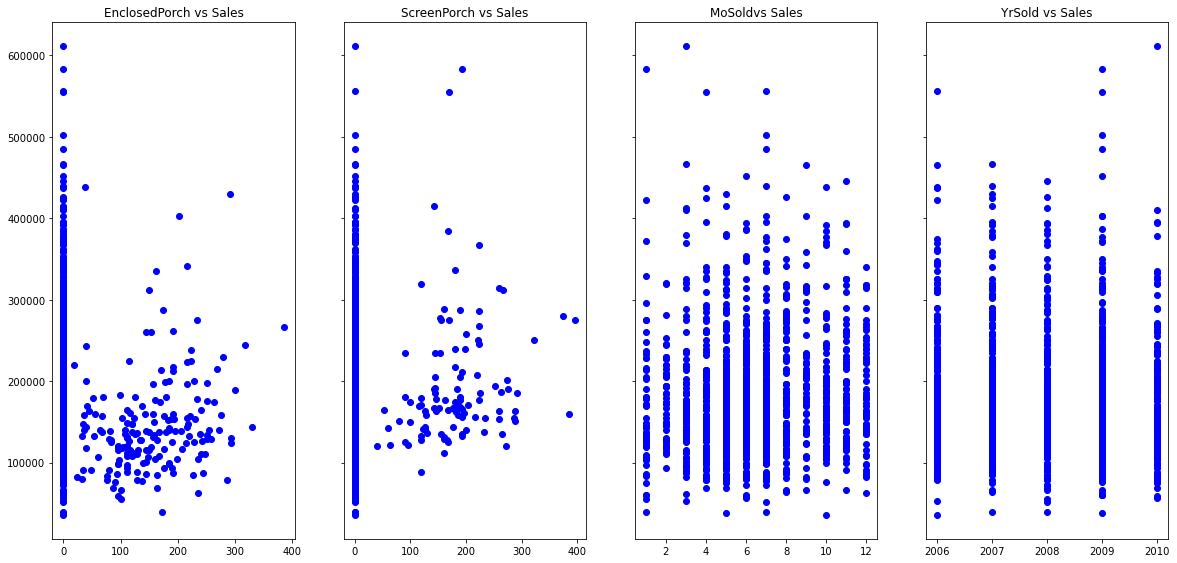

In [45]:
fig, ax = plt.subplots(ncols=4, sharey=True)

EnclosedPorch = ax[0].scatter(df['EnclosedPorch'], df['SalePrice'],color='blue')
EnclosedPorch.set_label("EnclosedPorch")
ax[0].set_title('EnclosedPorch vs Sales')


ScreenPorch= ax[1].scatter(df['ScreenPorch'], df['SalePrice'],color='blue')
ScreenPorch.set_label("ScreenPorch")
ax[1].set_title('ScreenPorch vs Sales')

MoSold = ax[2].scatter(df['MoSold'], df['SalePrice'],color='blue')
MoSold.set_label("MoSold")
ax[2].set_title('MoSoldvs Sales')

YrSold = ax[3].scatter(df['YrSold'], df['SalePrice'],color='blue')
YrSold.set_label("YrSold")
ax[3].set_title('YrSold vs Sales')

fig.set_size_inches(20, 9.5, forward=True)
plt.show()

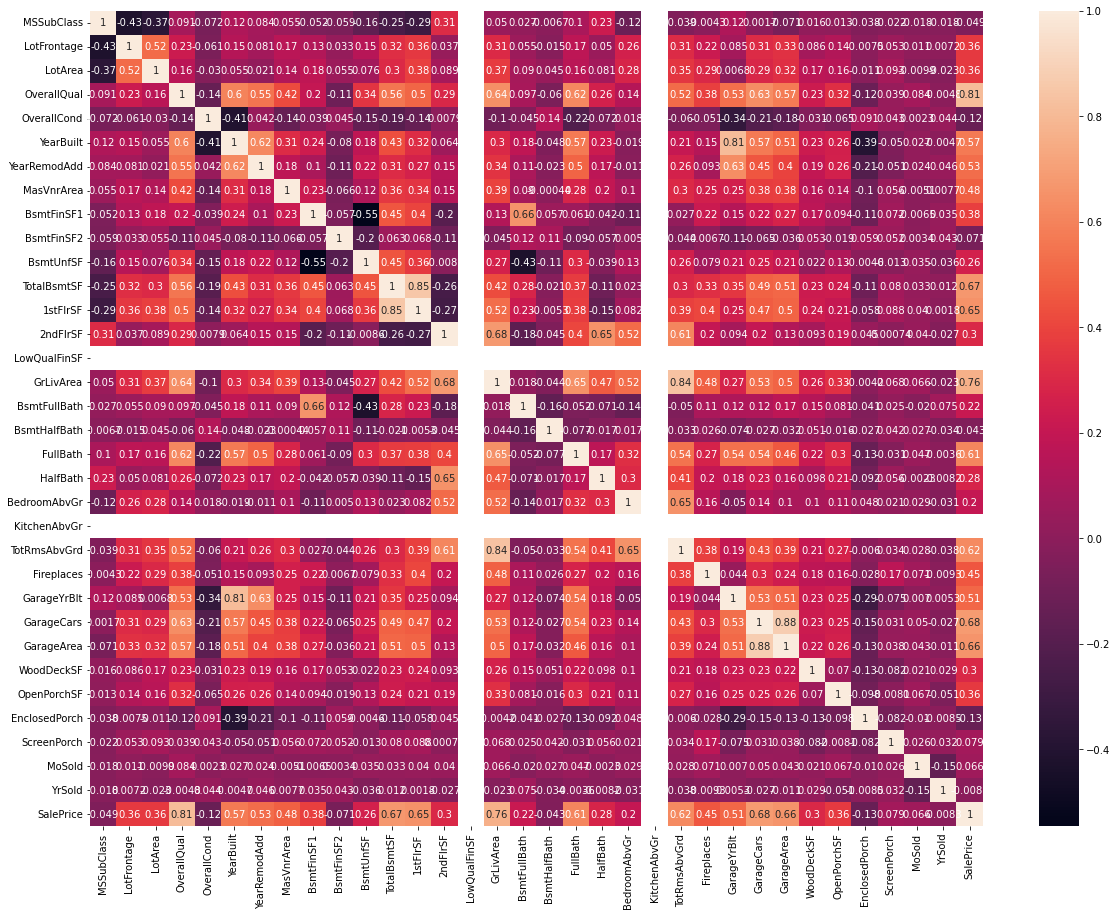

In [46]:
# Checking the coorelation between the variables using Heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True)
plt.show()

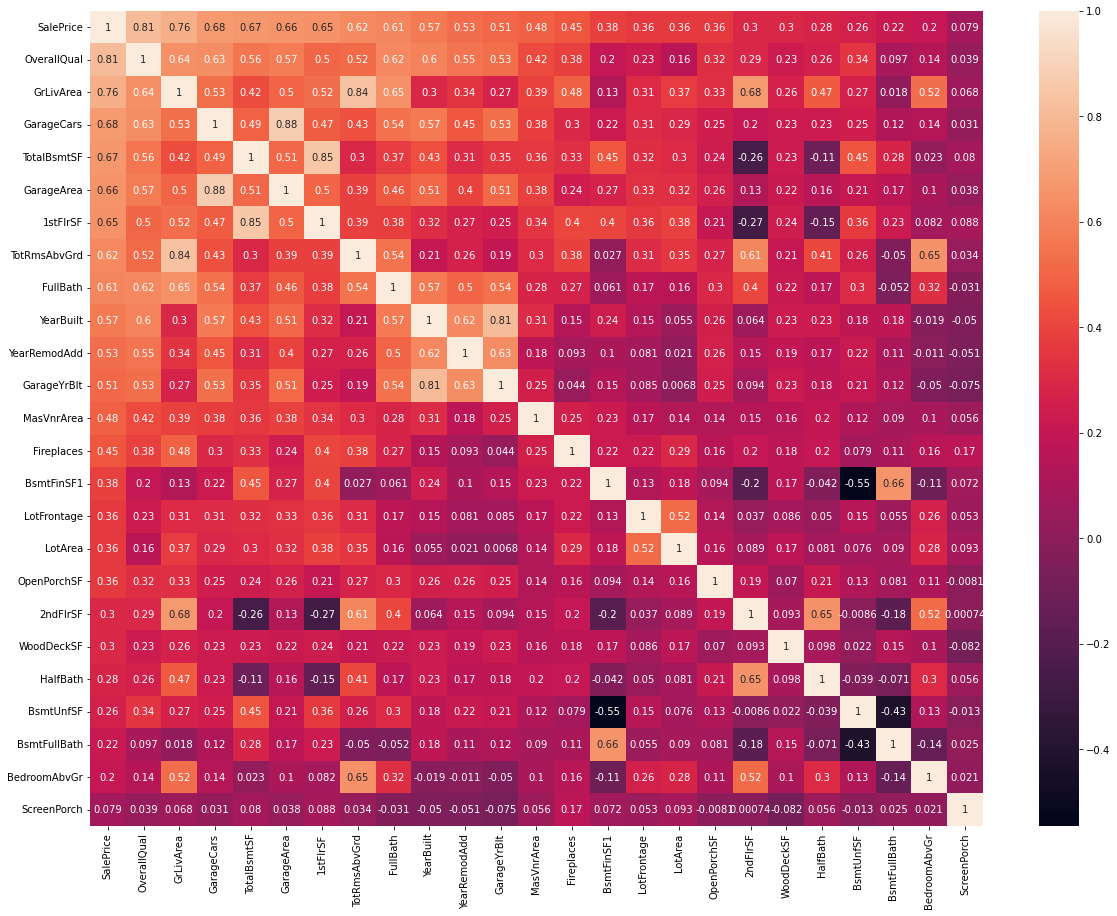

In [47]:
plt.figure(figsize = (20, 15))
n = 25
corrmat = df.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(df[cols].corr(),annot=True)
plt.show()

From above plot we can inder that 'OverallQual','GrLivArea','GarageCars','TotalBsmtSF','GarageArea','lstFlrSF' are highly correlated to Saleprice

#### Converting the categorical values to Dummy Variables

In [48]:
df=pd.get_dummies(df,drop_first=True)

In [49]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1

## Splitting the data to Train and Test

In [50]:
y = df.pop('SalePrice')

In [51]:
X = df

In [52]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [53]:
X.shape

(1333, 221)

In [54]:
# Importing the train_test_split library
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,60,69.0,8063,6,5,2000,2000,0.0,0,0,924,924,948,742,0,1690,0,0,2,1,3,1,7,1,2000.0,2,463,100,48,0,0,11,2007,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
745,

In [57]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,60,82.0,9452,8,5,1997,1998,423.0,1074,0,322,1396,1407,985,0,2392,1,0,2,1,3,1,7,1,1997.0,3,870,0,70,0,0,6,2006,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1

#### Scaling the Numeric Variables using MinMaxScaler

In [58]:
#Selecting all the variables in X_train whose dtypes are: 'int64','int32','float64','float32'
num_vars=X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

In [59]:
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
1108,60,69.0,8063,6,5,2000,2000,0.0,0,0,924,924,948,742,0,1690,0,0,2,1,3,1,7,1,2000.0,2,463,100,48,0,0,11,2007
745,60,69.0,8963,8,9,1976,1996,289.0,575,80,487,1142,1175,1540,0,2715,0,1,3,1,4,1,11,2,1994.0,2,831,0,204,0,0,7,2008
1134,60,57.0,8773,6,5,1997,1997,0.0,0,0,916,916,916,684,0,1600,0,0,2,1,3,1,7,1,1997.0,2,460,100,38,0,0,8,2007
512,20,70.0,9100,5,5,1958,1958,0.0,521,174,169,864,864,0,0,864,1,0,1,0,3,1,5,0,1964.0,2,624,0,0,0,0,7,2006
43,20,69.0,9200,5,6,1975,1980,0.0,280,491,167,938,938,0,0,938,1,0,1,0,3,1,5,0,1977.0,1,308,145,0,0,0,7,2008


In [60]:
#Importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [61]:
#Initializing the MinMaxScaler
scaler=MinMaxScaler()

In [62]:
#Now using the fit transform for X_train and transform for X_test
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [63]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,0.235294,0.298137,0.187723,0.555556,0.500,0.932836,0.833333,0.000000,0.000000,0.000000,0.395548,0.288210,0.170306,0.460583,0.0,0.407819,0.0,0.0,0.666667,0.5,0.500000,0.0,0.444444,0.333333,0.90,0.50,0.333094,0.135870,0.131868,0.0,0.0,0.909091,0.25,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0

In [64]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,0.235294,0.378882,0.227399,0.777778,0.50,0.910448,0.800000,0.374668,0.490859,0.000000,0.137842,0.435434,0.337336,0.611421,0.0,0.644422,0.5,0.0,0.666667,0.5,0.5,0.0,0.444444,0.333333,0.87,0.75,0.625899,0.000000,0.192308,0.000000,0.0,0.454545,0.00,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0

## Model Building

In [65]:
#Importing the Linear Regression and RFE libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Importing the libraries for Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [66]:
#Initializing the Linear Regression
lm = LinearRegression()

In [67]:
#Fitting the Linear regression in X_train and y_train
lm.fit(X_train, y_train)

LinearRegression()

In [68]:
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 34),
 ('LotFrontage', False, 62),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 140),
 ('MasVnrArea', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 16),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 23),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 175),
 ('BsmtHalfBath', False, 93),
 ('FullBath', False, 142),
 ('HalfBath', False, 176),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 25),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 181),
 ('GarageYrBlt', False, 141),
 ('GarageCars', False, 31),
 ('GarageArea', False, 156),
 ('WoodDeckSF', False, 97),
 ('OpenPorchSF', False, 60),
 ('EnclosedPorch', False, 125),
 ('ScreenPorch', False, 40),
 ('MoSold', False, 195),
 ('YrSold', False, 168),
 ('MSZoning_FV', False, 42),
 ('MSZoning_RH', False, 45),
 ('MSZoning_RL', False, 46),


In [70]:
# Extracting the important features
col = X_train.columns[rfe.support_]

In [71]:
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev', 'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtCond_Po', 'KitchenQual_TA', 'Functional_Maj2', 'SaleType_CWD', 'SaleType_Con'], dtype='object')

In [72]:
# Extracting the non-important features
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=196)

In [73]:
X_train1=X_train[col]
X_test1=X_test[col]

In [74]:
print("Shape of X_train1 is:",X_train1.shape)
print("Shape of X_test1 is:",X_test1.shape)
print("Shape of X_train is:",y_train.shape)
print("Shape of X_test is:",y_test.shape)

Shape of X_train1 is: (893, 25)
Shape of X_test1 is: (440, 25)
Shape of X_train is: (893,)
Shape of X_test is: (440,)


In [75]:
lm1=lm.fit(X_train, y_train)
print(lm1.intercept_)
print(lm1.coef_)

-4818368772268161.0
[-1.61854835e+04  1.31751632e+04  3.98756565e+04  5.32792413e+04
  4.41279264e+04  3.62791030e+04  6.18289631e+03  1.86037276e+04
 -6.56468775e+16 -2.71828478e+16 -7.00873427e+16  9.61900774e+16
  6.05149070e+14  3.54765339e+14 -1.03618438e+16 -6.53376015e+14
  1.67100000e+03 -5.87915625e+03  9.51112500e+03  1.66600000e+03
 -3.51080000e+04 -1.69848577e+16  2.87395000e+04  9.12000000e+02
 -5.49125000e+03  1.97192500e+04 -3.91550000e+03  1.08287500e+04
  1.08600000e+04  5.77968750e+03  2.30354062e+04  9.30000000e+01
 -3.09500000e+03  3.87010000e+04  3.16198750e+04  2.57680000e+04
  1.72460000e+04  4.71547500e+04  2.02859375e+02 -5.34354297e+03
  2.14375000e+03  1.25695000e+04 -1.23310000e+04  3.48500000e+03
 -4.58001250e+04  7.39975000e+03 -5.92962500e+03 -1.40008359e+04
 -2.49700000e+03  2.29000000e+02 -4.60915000e+04  1.44480625e+04
  7.53850000e+03 -7.11350000e+03 -1.92720000e+04 -1.13900625e+04
  7.53000000e+03 -2.09155625e+04 -1.35010000e+04 -1.37660000e+04
  5.6

In [76]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [77]:
# Calculating and printing the values for R2 Score, RSS and MSE
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Train data:',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test data:',r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train data:',rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test data:',rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train data:',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test data:',mse_test_lr)

R2 Score for Train data: 0.8861162143673417
R2 Score for Test data: 0.8621984638656063
RSS for Train data: 575718789319.2942
RSS for Test data: 342900018425.8451
MSE for Train data: 644701891.734932
MSE for Test data: 779318223.6951025


In [78]:
metric = []
metric.append(r2_train_lr)
metric.append(r2_test_lr)
metric.append(rss1_lr)
metric.append(rss2_lr)
metric.append(mse_train_lr**0.5)
metric.append(mse_test_lr**0.5)
metric

[0.8861162143673417,
 0.8621984638656063,
 575718789319.2942,
 342900018425.8451,
 25390.98051936813,
 27916.271665376495]

## Ridge and Lasso Regression

In [79]:
# Importing the Libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge

In [80]:
#List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [81]:
#Initialize ridge
ridge = Ridge()

In [82]:
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
print("Optimal Value of alpha:",ridge_model_cv.best_params_)

Optimal Value of alpha: {'alpha': 1.0}


In [84]:
print(ridge_model_cv.best_score_)

-18482.803269508768


In [85]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 59778.43193899, 115599.25240783,  35638.7453981 ,  54545.69231445,
        51586.65741023,  76674.75426405,  73061.08606324,  37149.87934552,
        87839.67648379, -52962.60386961,  52937.95245645,  49959.41242626,
       -27846.86292355, -11908.78565517,  11641.73110189,  18201.04992866,
       -37132.04706474, -32941.69929827, -54900.54384013, -62317.50821845,
        -2488.03978802,  -5437.66485492, -23574.92504926, -27224.57563114,
        21036.19375878])

In [86]:
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

In [87]:
# Calculating and printing the values for R2 Score, RSS and MSE
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for train data:",r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test data:",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train data",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data",mse_test_lr)

R2 Score for train data: 0.884340040460635
R2 score for test data: 0.869613280468847
RSS for train data 584697913832.1387
RSS for test data 324449275268.7017
MSE for train data 654756902.3876133
MSE for test data 737384716.5197766


In [88]:
metric2 = []
metric2.append(r2_train_lr)
metric2.append(r2_test_lr)
metric2.append(rss1_lr)
metric2.append(rss2_lr)
metric2.append(mse_train_lr**0.5)
metric2.append(mse_test_lr**0.5)
metric2

[0.884340040460635,
 0.869613280468847,
 584697913832.1387,
 324449275268.7017,
 25588.218038535106,
 27154.828604131835]

### Lasso

In [89]:
# Initialize Lasso
lasso = Lasso()

In [90]:
lasso_model_cv = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)
lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
print("Lasso optimum value of alpha is:",lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

Lasso optimum value of alpha is: {'alpha': 10.0}
-18594.69803192999


The optimum value of aplha in case of lasso is: 10

In [92]:
alpha =10
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train1, y_train)
lasso.coef_

array([ 63955.06420974, 119957.48334501,  37354.9818116 ,  53864.33290649,
        50216.53970147,  78348.09973513,   8832.8988634 ,      0.        ,
       163982.92064008, -62831.35838134,  51280.02369557,  63045.46082476,
       -37188.51082496, -21920.32387734,  17801.4526205 ,  32845.68407295,
       -69633.61592899, -60463.90672092, -58459.15210522, -64902.62253382,
            0.        ,  -4495.49144033, -40743.00725383, -35460.11883371,
        25659.755739  ])

In [93]:
y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

In [94]:
# Calculating and printing the values for R2 Score, RSS and MSE
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train data:",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test data:",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data:",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data:",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE for train data:",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data:",mse_test_lr)

R2 score for train data: 0.8859222400899005
R2 score for test data: 0.8646666084570093
RSS for train data: 576699391040.1375
RSS for test data: 336758382783.66797
RMSE for train data: 645799989.9665593
MSE for test data: 765359960.8719727


In [95]:
metric3 = []
metric3.append(r2_train_lr)
metric3.append(r2_test_lr)
metric3.append(rss1_lr)
metric3.append(rss2_lr)
metric3.append(mse_train_lr**0.5)
metric3.append(mse_test_lr**0.5)
metric3

[0.8859222400899005,
 0.8646666084570093,
 576699391040.1375,
 336758382783.66797,
 25412.59510491912,
 27665.139812984366]

#### Comparing the Values for R2 Score, RSS and MSE for Linear Regression, Ridge Regression and Lasso Regression

In [96]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'],'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.861162e-01,8.843400e-01,8.859222e-01
1,R2 Score (Test),8.621985e-01,8.696133e-01,8.646666e-01
2,RSS (Train),5.757188e+11,5.846979e+11,5.766994e+11
3,RSS (Test),3.429000e+11,3.244493e+11,3.367584e+11
4,MSE (Train),2.539098e+04,2.558822e+04,2.541260e+04
5,MSE (Test),2.791627e+04,2.715483e+04,2.766514e+04


## Model Evaluation

In [97]:
ridge_pred = ridge.predict(X_test1)

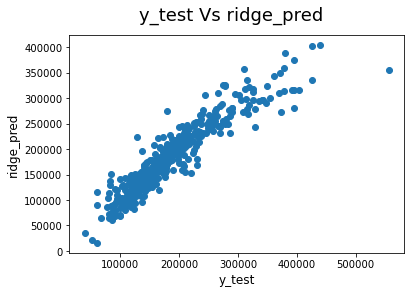

In [98]:
# PLotting the graph between y_test and ridge_pred to understand the data spread
fig = plt.figure()
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test Vs ridge_pred', fontsize=18)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('ridge_pred', fontsize=12)
plt.show()

In [99]:
lasso_pred = lasso.predict(X_test1)

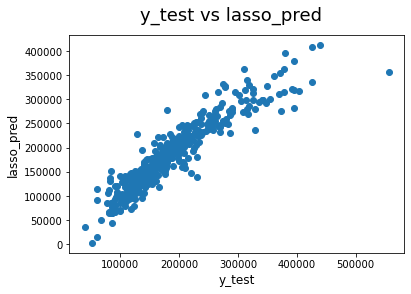

In [100]:
# PLotting the graph between y_test and lasso_pred to understand the data spread
fig = plt.figure()
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=18)           
plt.xlabel('y_test', fontsize=12)                          
plt.ylabel('lasso_pred', fontsize=12)  
plt.show()

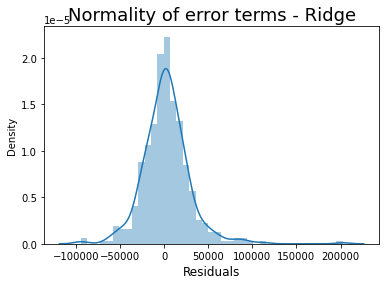

In [101]:
y_res=y_test-ridge_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms - Ridge',fontsize=18)
plt.xlabel("Residuals",fontsize=12)
plt.show()

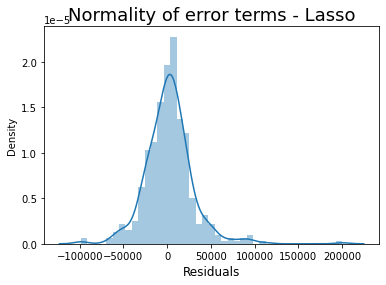

In [102]:
y_res=y_test-lasso_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms - Lasso',fontsize=18)
plt.xlabel("Residuals",fontsize=12)
plt.show()

In [103]:
#Checking the chnage in Coffecient after Regularization
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns

In [104]:

# Betas for Ridge
betas['Ridge'] = ridge.coef_
# Betas for Lasso
betas['Lasso'] = lasso.coef_

In [105]:
betas.head(100)

,Ridge,Lasso
LotArea,59778.431939,63955.064210
OverallQual,115599.252408,119957.483345
OverallCond,35638.745398,37354.981812
YearBuilt,54545.692314,53864.332906
BsmtFinSF1,51586.657410,50216.539701
TotalBsmtSF,76674.754264,78348.099735
1stFlrSF,73061.086063,8832.898863
2ndFlrSF,37149.879346,0.000000
GrLivArea,87839.676484,163982.920640
BedroomAbvGr,-52962.603870,-62831.358381


## Assignment Questions:

#### Question 1:
<u>Variables Significant in predicting the price of the house:</u>
- Lot size in square feet(LotArea)
- Rates the overall material and finish of the house(OverallQual)
- Rates the overall condition of the house(OverallCond)
- Original construction date(YearBuilt)
- Type 1 finished square feet(BsmtFinSF1)
- Total square feet of basement area(TotalBsmtSF)
- Above grade (ground) living area square feet(GrLivArea)
- Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd)
- Pave road access to property(Street_Pave)
- Roof material_Metal(RoofMatl_Metal)

<u>Optimal Value of Alpha for ridge and lasso are:</u>
- Ridge - 1
- Lasso - 10

#### Double the value of Alpha in case of Ridge

In [106]:
#Change the alpha value from 1 to 2
alpha = 2
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train1, y_train)

Ridge(alpha=2)

In [107]:
y_pred_train = ridge2.predict(X_train1)
y_pred_test = ridge2.predict(X_test1)

In [108]:
# Calculating and printing the values for R2 Score, RSS and MSE
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for train data:",r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test data:",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train data",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data",mse_test_lr)

R2 Score for train data: 0.882087717315285
R2 score for test data: 0.87108088253483
RSS for train data 596084124320.2522
RSS for test data 320797350989.8854
MSE for train data 667507418.0517942
MSE for test data 729084888.6133759


In [109]:
metric2_new = []
metric2_new.append(r2_train_lr)
metric2_new.append(r2_test_lr)
metric2_new.append(rss1_lr)
metric2_new.append(rss2_lr)
metric2_new.append(mse_train_lr**0.5)
metric2_new.append(mse_test_lr**0.5)
metric2_new

[0.882087717315285,
 0.87108088253483,
 596084124320.2522,
 320797350989.8854,
 25836.164925386936,
 27001.57196559815]

After we double the alpha in case of Ridge the R2 Score in case of training data has decreased but increased in case of test data.

#### Double the value of alpha in case of Lasso

In [110]:
#Changing the value of alpha from 10 to 20
alpha =20
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train1, y_train) 

Lasso(alpha=20)

In [111]:
y_pred_train = lasso20.predict(X_train1)
y_pred_test = lasso20.predict(X_test1)

In [112]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for train data:",r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test data:",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train data",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data",mse_test_lr)

R2 Score for train data: 0.8854019697956436
R2 score for test data: 0.8670105921065013
RSS for train data 579329522996.7144
RSS for test data 330925704432.2682
MSE for train data 648745266.5136778
MSE for test data 752103873.7097005


In [113]:
metric3_new = []
metric3_new.append(r2_train_lr)
metric3_new.append(r2_test_lr)
metric3_new.append(rss1_lr)
metric3_new.append(rss2_lr)
metric3_new.append(mse_train_lr**0.5)
metric3_new.append(mse_test_lr**0.5)
metric3_new

[0.8854019697956436,
 0.8670105921065013,
 579329522996.7144,
 330925704432.2682,
 25470.478333036423,
 27424.512278428952]

After we double the alpha in case of Lasso the R2 Score in case of training data has decreased but increased in case of test data.

In [114]:
#Predicting the Important variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge Double Alpha'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso Double Alpha'] = lasso20.coef_
pd.set_option('display.max_rows', None)
betas

,Ridge Double Alpha,Ridge,Lasso,Lasso Double Alpha
LotArea,55922.640992,59778.431939,63955.064210,63617.887669
OverallQual,110944.014490,115599.252408,119957.483345,121719.072148
OverallCond,33226.593469,35638.745398,37354.981812,36948.765235
YearBuilt,54344.573607,54545.692314,53864.332906,53764.548095
BsmtFinSF1,52663.731203,51586.657410,50216.539701,50458.153814
TotalBsmtSF,74096.707724,76674.754264,78348.099735,78209.333502
1stFlrSF,71476.123090,73061.086063,8832.898863,8244.958141
2ndFlrSF,35224.759353,37149.879346,0.000000,0.000000
GrLivArea,85326.415089,87839.676484,163982.920640,162804.680303
BedroomAbvGr,-44604.715801,-52962.603870,-62831.358381,-61134.170375


<u>New Predictor variable:</u>
- Lot size in square feet(LotArea)
- Rates the overall material and finish of the house(OverallQual)
- Rates the overall condition of the house(OverallCond)
- Original construction date(YearBuilt)
- Type 1 finished square feet(BsmtFinSF1)
- Total square feet of basement area(TotalBsmtSF)
- Above grade (ground) living area square feet(GrLivArea)
- Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd)
- Pave road access to property(Street_Pave)
- Roof material_Metal(RoofMatl_Metal)


From above we can infer that on doubling the values of alpha in case of ridge and lasso, predictor variables are same the only difference is that the coffecients of these predictors has changed.

#### Question 2:
As the value of R2 score is slightly higher for lasso in case of test data set. So we will choose Lasso regression to solve this problem.

#### Question 3:

In [115]:
X_train1.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev', 'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtCond_Po', 'KitchenQual_TA', 'Functional_Maj2', 'SaleType_CWD', 'SaleType_Con'], dtype='object')

From above we can see that top 5 important predictors are: 'LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'.
So drooping these columns and then finding the Lasso regression for the same.

In [116]:
X_train_drop = X_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test_drop = X_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [117]:
X_train_drop.head()

,OverallCond,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Street_Pave,LandSlope_Sev,Condition2_PosN,RoofStyle_Shed,RoofMatl_Metal,Exterior1st_Stone,Exterior2nd_CBlock,ExterQual_Gd,ExterQual_TA,BsmtCond_Po,KitchenQual_TA,Functional_Maj2,SaleType_CWD,SaleType_Con
1108,0.500,0.170306,0.460583,0.407819,0.500000,0.444444,1,0,0,0,0,0,0,0,1,0,1,0,0,0
745,1.000,0.252911,0.955928,0.753286,0.666667,0.888889,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1134,0.500,0.158661,0.424581,0.377486,0.500000,0.444444,1,0,0,0,0,0,0,0,1,0,1,0,0,0
512,0.500,0.139738,0.000000,0.129424,0.500000,0.222222,1,0,0,0,0,0,0,0,1,0,1,0,0,0
43,0.625,0.166667,0.000000,0.154365,0.500000,0.222222,1,0,0,0,0,0,0,0,1,0,1,0,0,0


In [118]:
X_test_drop.head()

,OverallCond,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Street_Pave,LandSlope_Sev,Condition2_PosN,RoofStyle_Shed,RoofMatl_Metal,Exterior1st_Stone,Exterior2nd_CBlock,ExterQual_Gd,ExterQual_TA,BsmtCond_Po,KitchenQual_TA,Functional_Maj2,SaleType_CWD,SaleType_Con
990,0.50,0.337336,0.611421,0.644422,0.5,0.444444,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1161,0.75,0.422125,0.000000,0.390967,0.5,0.444444,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1369,0.50,0.432314,0.000000,0.400404,0.5,0.555556,1,0,0,0,0,0,0,1,0,0,0,0,0,0
329,0.50,0.042213,0.369957,0.239973,0.5,0.333333,1,0,0,0,0,0,0,0,1,0,1,0,0,0
262,0.75,0.266376,0.000000,0.246714,0.5,0.333333,1,0,0,0,0,0,0,0,1,0,1,0,0,0


<u> Now performing the Lasso regression after dropping the columns </u>

In [119]:
alpha =10
lasso_drop = Lasso(alpha=alpha)
lasso_drop.fit(X_train_drop, y_train)

Lasso(alpha=10)

In [120]:
y_pred_train = lasso_drop.predict(X_train_drop)
y_pred_test = lasso_drop.predict(X_test_drop)

In [121]:
# Now calculating the value of R2 Score, RSS and MSE
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for train data:",r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test data:",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data",rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data",rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for train data",mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data",mse_test_lr)

R2 Score for train data: 0.7988346707068132
R2 score for test data: 0.7588103209258127
RSS for train data 1016954777102.8658
RSS for test data 600167078819.8167
MSE for train data 1138807141.2126157
MSE for test data 1364016088.226856


From above we can infer theta the R2 score has now decreased for both the training and test data.

In [122]:
# Now calculating the important predictor variables
betas = pd.DataFrame(index=X_train_drop.columns)
betas.rows = X_train1.columns
betas['Lasso_drop'] = lasso_drop.coef_
pd.set_option('display.max_rows', None)
betas

,Lasso_drop
OverallCond,7403.774043
1stFlrSF,163379.262938
2ndFlrSF,12227.759048
GrLivArea,186638.919740
BedroomAbvGr,-71218.036474
TotRmsAbvGrd,41610.305613
Street_Pave,101376.262107
LandSlope_Sev,-40205.679947
Condition2_PosN,0.000000
RoofStyle_Shed,53262.728685


<u>From above we can infer that the 5 important predictor variables are:</u>
- First Floor square feet(11stFlrSF)
- Above grade (ground) living area square feet(GrLivArea)
- Pave road access to property(Street_Pave)
- Roof material_Metal(RoofMatl_Metal)
- Type of roof(Shed)(RoofStyle_Shed)